In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url='https://kostat.go.kr/cpidtval.es?mid=b70201010000'
r=requests.post(url)
soup=BeautifulSoup(r.text, "html.parser")

In [4]:
table=soup.find("table")
rows=table.find('tbody').find_all('tr')
print(table)
print(rows)

<table>
<caption>최근 월별 동향의 지수, 전월비, 전년동월비 비교 테이블 입니다.</caption>
<colgroup>
<col width="10%"/>
<col width=""/>
<col width=""/>
<col width=""/>
<col width=""/>
<col width=""/>
<col width=""/>
<col width=""/>
<col width=""/>
<col width=""/>
<col width=""/>
<col width=""/>
</colgroup>
<thead>
<tr>
<th rowspan="2"></th>
<th colspan="13">최근 월별 동향</th>
</tr>
<tr class="pointG">
<th class="" scope="col">10</th>
<th class="" scope="col">11</th>
<th class="" scope="col">12</th>
<th class="" scope="col">2023.1</th>
<th class="" scope="col">2</th>
<th class="" scope="col">3</th>
<th class="" scope="col">4</th>
<th class="" scope="col">5</th>
<th class="" scope="col">6</th>
<th class="" scope="col">7</th>
<th class="" scope="col">8</th>
<th class="" scope="col">9</th>
<th class="" scope="col">10</th>
</tr>
</thead>
<tbody>
<tr>
<th class="brdRight" scope="row">지수</th>
<td class="align_r" scope="col">
								109.21
							</td>
<td class="align_r" scope="col">
								109.10
							</td>
<td class=

In [5]:
headers = [th.text.strip() for th in table.select('thead th')[1:]]


data = {}
for row in table.select('tbody tr'):
    row_data = [td.text.strip() for td in row.select('td')]
    category = row.select_one('th').text.strip()
    data[category] = row_data


print("Headers:", headers)
for category, values in data.items():
    print(category, ":", values)

Headers: ['최근 월별 동향', '10', '11', '12', '2023.1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
지수 : ['109.21', '109.10', '109.28', '110.10', '110.38', '110.56', '110.80', '111.13', '111.12', '111.20', '112.33', '112.99', '113.37']
전월비 : ['0.3', '-0.1', '0.2', '0.8', '0.3', '0.2', '0.2', '0.3', '0.0', '0.1', '1.0', '0.6', '0.3']
전년동월비 : ['5.7', '5.0', '5.0', '5.2', '4.8', '4.2', '3.7', '3.3', '2.7', '2.3', '3.4', '3.7', '3.8']


In [47]:
headers = [th.text.strip() for th in table.select('thead th')[1:]]


data = {}
for row in table.select('tbody tr'):
    row_data = [td.text.strip() for td in row.select('td')]
    category = row.select_one('th').text.strip()
    data[category] = row_data


csv_file_path = r'C:\Users\juntaek\Desktop\extracted_data.csv'

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    

    writer.writerow(['Category'] + headers)
    

    for category, values in data.items():
        writer.writerow([category] + values)

print(f"CSV file saved to: {csv_file_path}")

CSV file saved to: C:\Users\juntaek\Desktop\extracted_data.csv


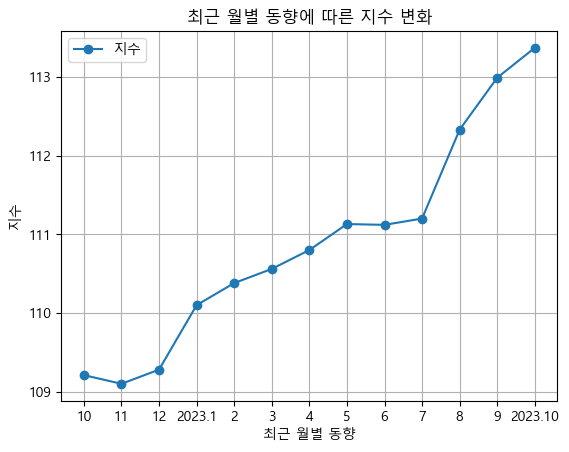

In [13]:
headers = ['최근 월별 동향', '10', '11', '12', '2023.1', '2', '3', '4', '5', '6', '7', '8', '9', '2023.10']
data = {
    '지수': ['109.21', '109.10', '109.28', '110.10', '110.38', '110.56', '110.80', '111.13', '111.12', '111.20', '112.33', '112.99', '113.37']
}

import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

fig, ax = plt.subplots()

x_values = headers[1:]
y_values = list(map(float, data['지수']))

ax.plot(x_values, y_values, marker='o', label='지수')

ax.set_xlabel('최근 월별 동향')
ax.set_ylabel('지수')
ax.set_title('최근 월별 동향에 따른 지수 변화')

ax.grid(True)
ax.legend()

plt.show()

In [15]:
cpi=pd.read_excel(r'C:\Users\juntaek\Desktop\소비자물가지수.xlsx')
cpi

,연도,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,소비자물가 총지수(2020=100),91.8,93.0,94.2,94.9,95.8,97.6,99.1,99.5,100.0,102.5,107.7
1,소비자물가상승률(%),2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5,2.5,5.1
2,식료품 · 비주류음료,4.0,0.9,0.3,1.6,2.3,3.4,2.8,0.0,4.4,5.9,5.9
3,주류 및 담배,1.5,1.7,-0.1,50.1,0.7,1.5,0.3,0.6,0.3,0.4,2.2
4,의류 및 신발,4.8,2.9,4.0,1.3,1.8,1.1,1.1,0.1,0.7,0.6,3.1
5,주택 ·수도 · 전기 및 연료,4.6,3.5,2.9,-0.6,-0.8,1.7,0.7,1.2,0.5,1.6,5.5
6,가정용품 및 가사 서비스,2.9,0.3,2.1,2.6,1.6,1.1,2.3,2.1,0.0,1.9,4.8
7,보건,0.9,0.4,0.7,1.3,1.0,0.9,-0.1,0.5,1.5,-0.1,0.8
8,교통,3.2,-0.5,-1.6,-7.8,-2.2,3.6,2.4,-1.8,-1.8,6.3,9.7
9,통신,-2.6,-0.1,-0.1,-0.2,0.1,0.3,-0.9,-2.3,-2.1,-0.9,0.9


In [37]:
cp1 = cpi.iloc[0:2, [0, 7, 8, 9, 10, 11]]
cp1

,연도,2018,2019,2020,2021,2022
0,소비자물가 총지수(2020=100),99.1,99.5,100.0,102.5,107.7
1,소비자물가상승률(%),1.5,0.4,0.5,2.5,5.1


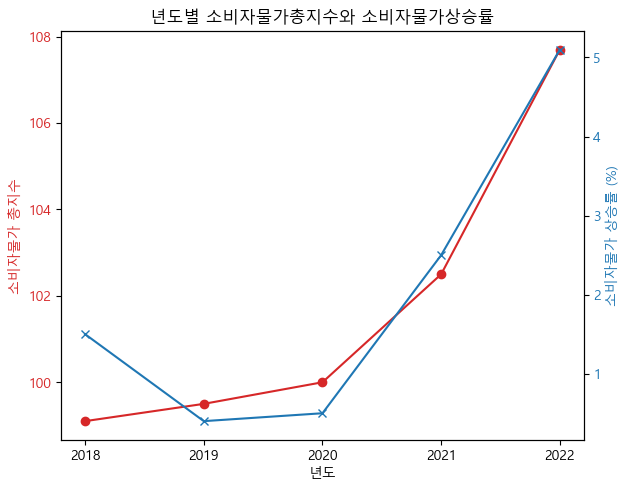

In [11]:
years = [2018, 2019, 2020, 2021, 2022]
cpi_total_index = [99.1, 99.5, 100.0, 102.5, 107.7]
cpi_inflation_rate = [1.5, 0.4, 0.5, 2.5, 5.1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('소비자물가 총지수', color=color)
ax1.plot(years, cpi_total_index, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
plt.xticks(years)
color = 'tab:blue'
ax2.set_ylabel('소비자물가 상승률 (%)', color=color)
ax2.plot(years, cpi_inflation_rate, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('년도별 소비자물가총지수와 소비자물가상승률')
plt.show()